In [1]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image as pil_image

# Utilities

In [2]:
def imgs_show(imgs, rows, fontsize=36):
    fig = plt.figure()
    for n, (img, title) in enumerate(imgs):
        a = fig.add_subplot(rows, np.ceil(len(imgs)/float(rows)), n + 1)
        a.set_title(title, fontdict={"fontsize": fontsize})
        plt.imshow(img)
    fig.set_size_inches(np.array(fig.get_size_inches()) * len(imgs))
    plt.show()

def read_folder(folder, ext):
    images = []

    for r, d, f in os.walk(folder):
        for file in f:
            if file.endswith(ext):
                path = os.path.join(r, file)
                images.append(np.array(pil_image.open(path)))
    return images

def separate_foregraund(img, rect, iterations_number=5):
    # rect = (x, y, w, h)
    mask = np.zeros(img.shape[:2], np.uint8)
    bgdModel = np.zeros((1,65), np.float64)
    fgdModel = np.zeros((1,65), np.float64)
    cv2.grabCut(img, mask, rect, bgdModel, fgdModel, iterations_number, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
    return img*mask2[:,:,np.newaxis]

# Images

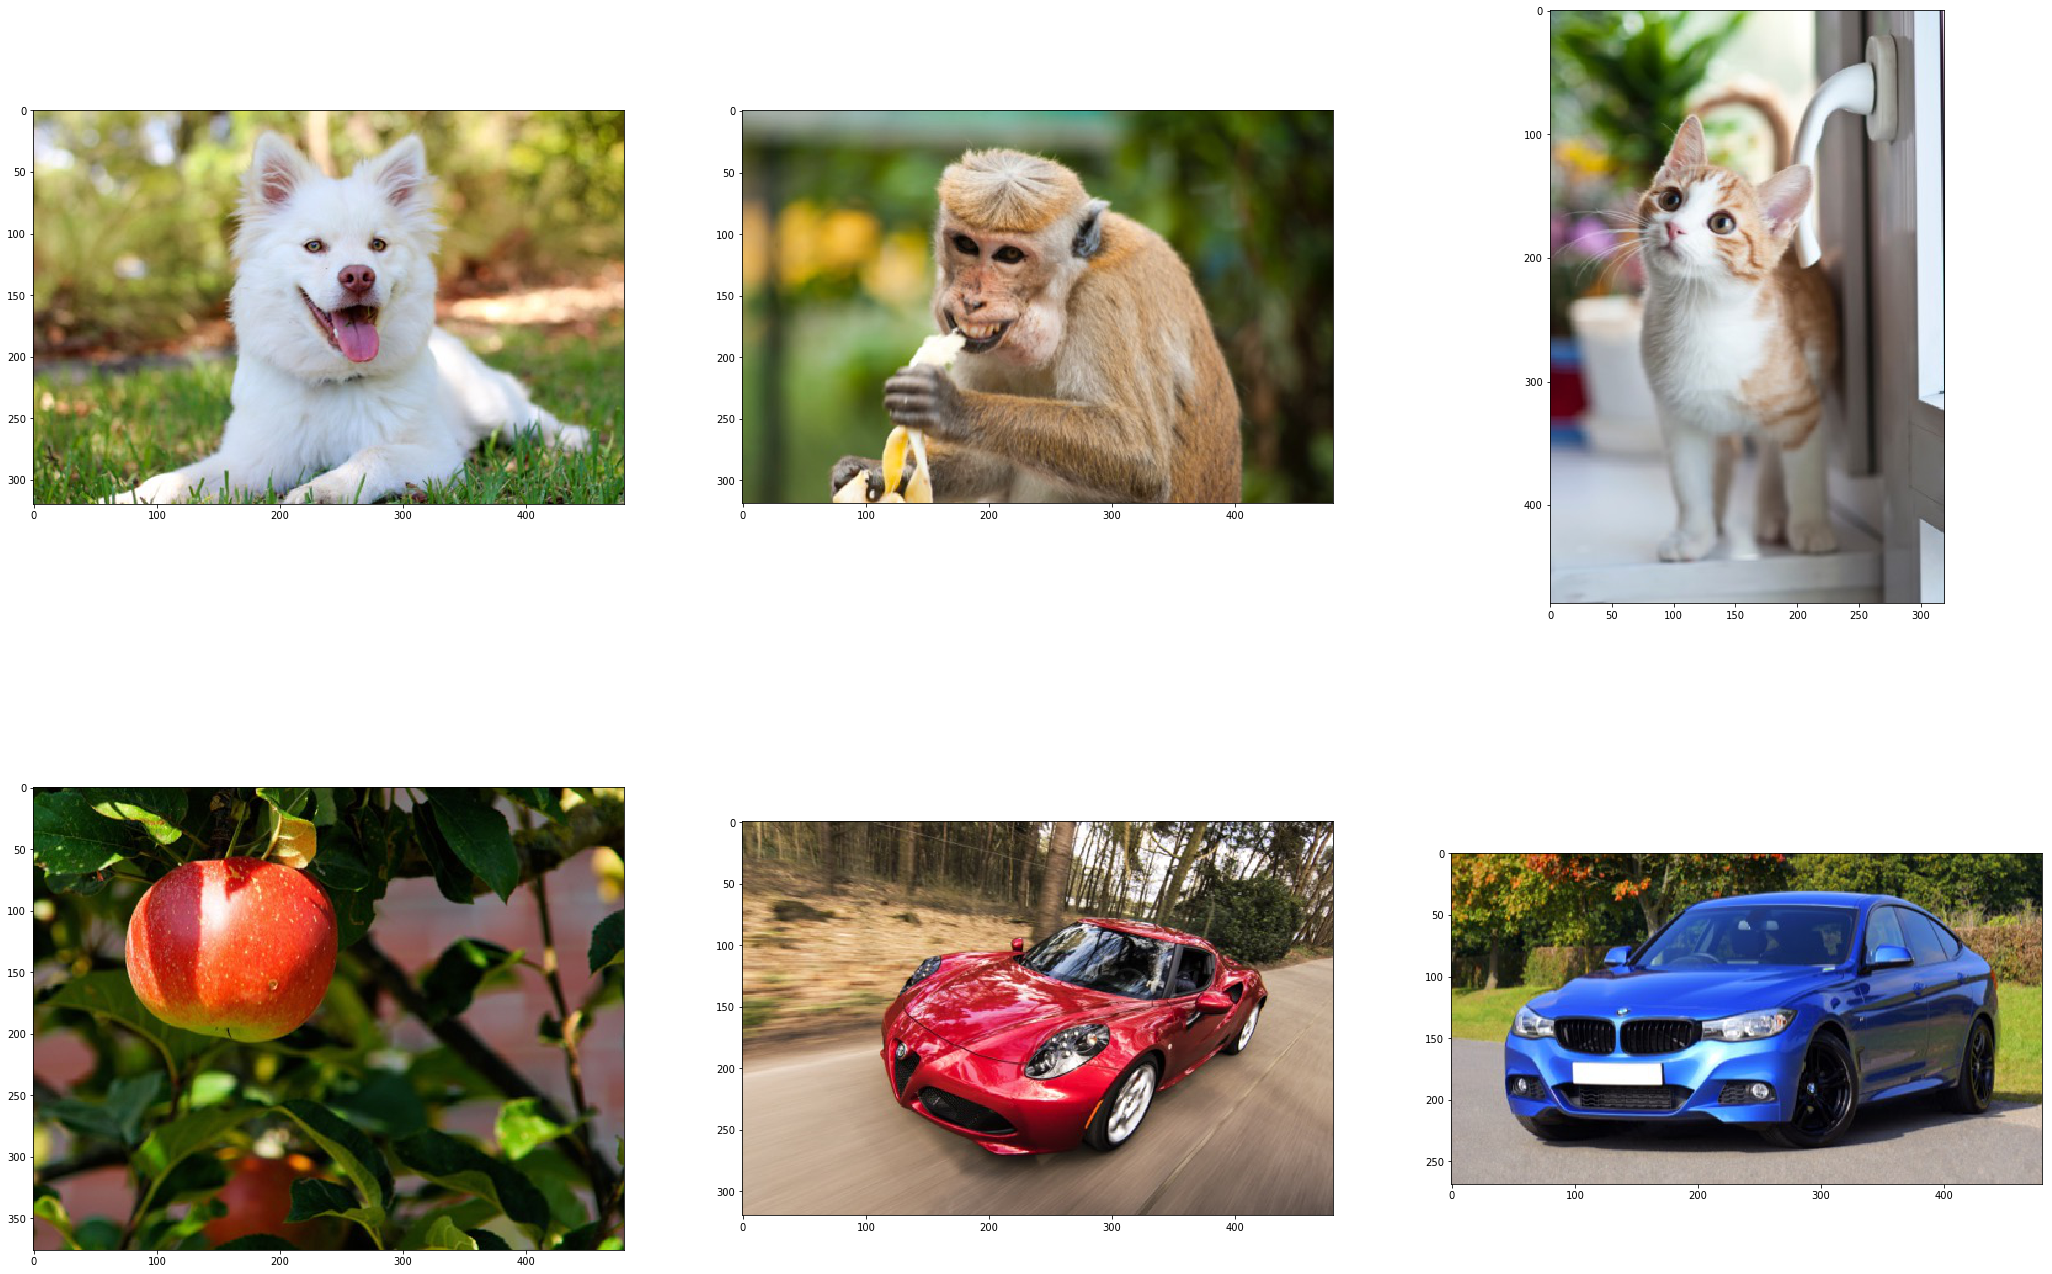

In [3]:
images = read_folder('./object', '.jpg')
imgs_show([(img, "") for img in images], 2)

# Objects separation 

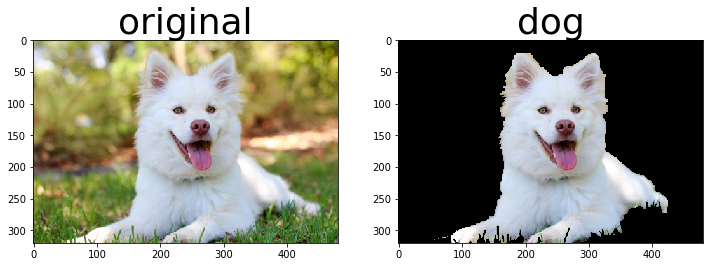

In [4]:
imgs_show([(images[0], "original"), (separate_foregraund(images[0], (25, 20, 400, 300), iterations_number=30), "dog")], 1)

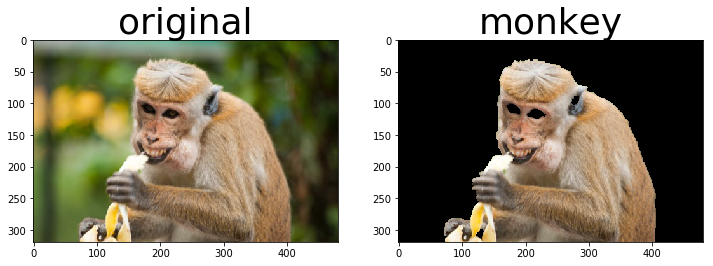

In [5]:
imgs_show([(images[1], "original"), (separate_foregraund(images[1], (50, 20, 400, 300), iterations_number=13), "monkey")], 1)

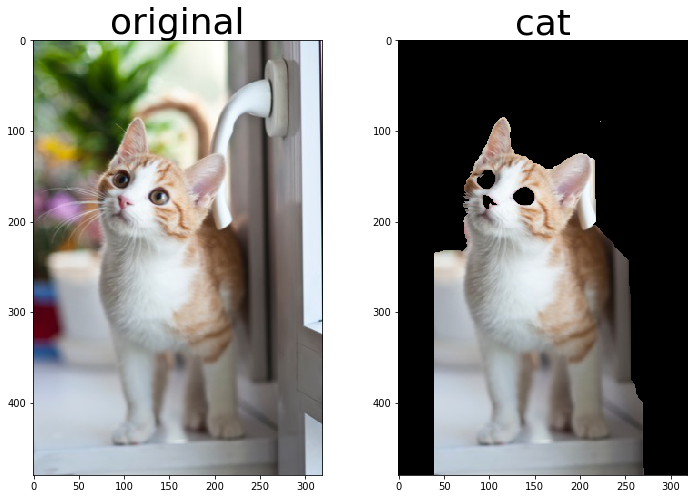

In [6]:
imgs_show([(images[2], "original"), (separate_foregraund(images[2], (40, 50, 240, 430), iterations_number=20), "cat")], 1)

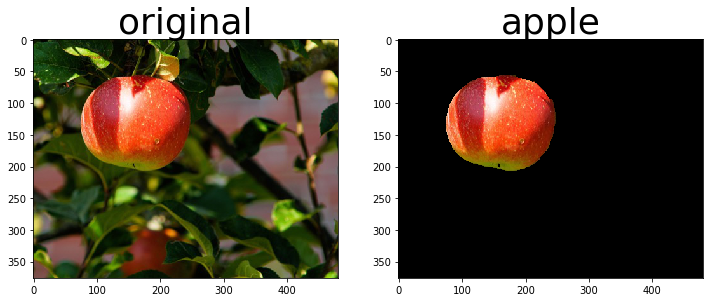

In [7]:
imgs_show([(images[3], "original"), (separate_foregraund(images[3], (50, 50, 240, 220), iterations_number=10), "apple")], 1)

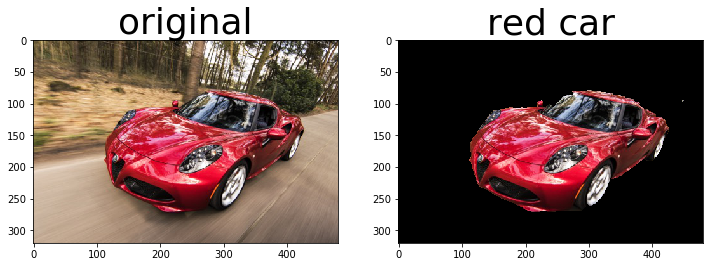

In [8]:
imgs_show([(images[4], "original"), (separate_foregraund(images[4], (100, 60, 440, 250), iterations_number=30), "red car")], 1)

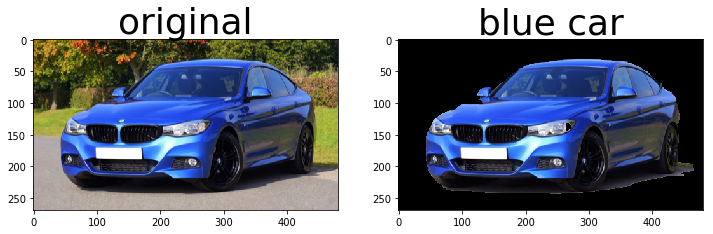

In [14]:
imgs_show([(images[5], "original"), (separate_foregraund(images[5], (40, 30, 430, 220), iterations_number=30), "blue car")], 1)